# Step 4: Reconstruction

## a) Reconstruct

In [1]:
distances = [15, 35]
doubleplanes = [8, 12, 20, 30]
energies = [200, 600, 1000]
erels = [100, 500, 1000, 2000, 3000]
neutrons = [1, 2, 3, 4, 5, 6]
physicss = ["bert", "bic", "inclxx"]

In [2]:
import joblib
from reconstruction import reconstruction

joblib.Parallel(n_jobs=-1, backend="loky", verbose=1)(
    joblib.delayed(reconstruction)(
        distance=distance, doubleplane=doubleplane, energy=energy, erel=erel, neutron=neutron, physics=physics,
    )
    for distance in distances
    for energy in energies
    for doubleplane in doubleplanes
    for neutron in neutrons
    for erel in erels
    for physics in physicss
)

print("Done")

Welcome to JupyROOT 6.16/00


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 40.2min finished


Done


## b) Check reco

In [2]:
import pandas as pd
import numpy as np
import joblib
import os
import ROOT
from helpers import filename_for

ROOT.ROOT.EnableThreadSafety()

Welcome to JupyROOT 6.16/00


In [3]:
def processed_events(distance, doubleplane, energy, erel, neutron, physics):
    filename = filename_for(distance, doubleplane, energy, erel, neutron, physics, ".reco.root")
    if os.path.isfile(filename):
        try:
            tfile = ROOT.TFile.Open(filename)
            ttree = tfile.Get("evt")
            num_events = int(ttree.GetEntries())
            return (filename, num_events)
        except:
            pass
    return (filename, 0)

In [4]:
evts = pd.DataFrame(
    joblib.Parallel(n_jobs=-1, backend="multiprocessing", verbose=1)(
        joblib.delayed(processed_events)(
            distance=distance, doubleplane=doubleplane, energy=energy, erel=erel, neutron=neutron, physics=physics,
        )
        for distance in distances
        for energy in energies
        for doubleplane in doubleplanes
        for neutron in neutrons
        for erel in erels
        for physics in physicss
    )
)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 2097 out of 2160 | elapsed:    6.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    7.0s finished


In [5]:
pd.options.display.max_rows = 5
evts.columns = ["File", "Events"]
evts.sort_values(by=["Events", "File"], ascending=[True, True], inplace=True)
evts.style.hide_index().format({"Events": "{:d}"})
display(evts)

,File,Events
816,output/bert/15m_12dp_1000AMeV_1000keV_1n.reco....,10000
831,output/bert/15m_12dp_1000AMeV_1000keV_2n.reco....,10000
...,...,...
1505,output/inclxx/35m_8dp_600AMeV_500keV_5n.reco.root,10000
1520,output/inclxx/35m_8dp_600AMeV_500keV_6n.reco.root,10000


## c) Inspect example file

In [6]:
from helpers import filename_for
import pandas as pd
import numpy as np
import ROOT

In [7]:
distance = 15
doubleplane = 30
energy = 600
erel = 100
neutron = 4
physics = "inclxx"

In [8]:
fn = filename_for(distance, doubleplane, energy, erel, neutron, physics, ".reco.root")
f = ROOT.TFile.Open(fn)
f.cd("NeulandNeutronReconstructionMon")
f.ls()

TFile**		output/inclxx/15m_30dp_600AMeV_100keV_4n.reco.root	
 TFile*		output/inclxx/15m_30dp_600AMeV_100keV_4n.reco.root	
  TDirectoryFile*		NeulandNeutronReconstructionMon	NeulandNeutronReconstructionMon
   KEY: TH1D	fhCountN;2	Number of reconstructed Neutrons
   KEY: TH1D	fhCountN;1	Number of reconstructed Neutrons
   KEY: TH1D	fhCountNdiff;2	Number of reacted primary Neutrons - Number of reconstructed Neutrons
   KEY: TH1D	fhCountNdiff;1	Number of reacted primary Neutrons - Number of reconstructed Neutrons
   KEY: TH1D	fhScore;2	Neuland Neutron Reconstruction Score (lower is better)
   KEY: TH1D	fhScore;1	Neuland Neutron Reconstruction Score (lower is better)
   KEY: TH1D	fhEdiff;2	Energy of primary Neutron - Energy of reconstructed Neutron
   KEY: TH1D	fhEdiff;1	Energy of primary Neutron - Energy of reconstructed Neutron
   KEY: TH1D	fhErel;2	fhErel
   KEY: TH1D	fhErel;1	fhErel
   KEY: TH1D	fhErelMC;2	fhErelMC
   KEY: TH1D	fhErelMC;1	fhErelMC
   KEY: TH2D	fhErelVSnNreco;2	fhErelVSn

Workaround for jupyter lab until up-to-date ROOT version is in FairRoot

In [9]:
%%javascript
var s = document.createElement('script');
s.src='https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.6/require.min.js';
document.body.appendChild(s);

<IPython.core.display.Javascript object>

In [10]:
%jsroot on
c1 = ROOT.TCanvas("c1", "c1", 800, 600)
h1 = f.Get(f"NeulandNeutronReconstructionMonBayes/fhErel{neutron}")
h1.Rebin(10)
h1.Draw()
c1.Draw()

In [11]:
%jsroot on
c2 = ROOT.TCanvas("c2", "c2", 800, 600)
h2 = f.Get("NeulandNeutronReconstructionMon/fhErelMC")
h2.Draw()
c2.Draw()

## c) Plot example spectrum with rootpy and matplotlib

In [12]:
from plotconfroot import *
from helpers import filename_for

In [13]:
def fit_n_plot(ax, xmin, xmax, hist):
    fitresult = hist.Fit("gaus", "S", "", xmin, xmax)
    fun = fitresult.FittedFunction().GetFunction()
    xs = np.arange(xmin, xmax, 1)
    ys = [fun.Eval(x) for x in xs]

    ax.set_xlim(0, erel * 3)
    rplt.step(hist, axes=ax, color="black")
    ax.plot(xs, ys, color="red")
    ax.text(
        0.98,
        0.9,
        fr"$\sigma$ = {round(fitresult.GetParams()[2])} keV",
        horizontalalignment="right",
        verticalalignment="center",
        transform=ax.transAxes,
        fontsize=25,
    )

    twosigintegral = hist.Integral(
        hist.FindBin(fitresult.GetParams()[1] - 2 * fitresult.GetParams()[2]),
        hist.FindBin(fitresult.GetParams()[1] + 2 * fitresult.GetParams()[2]),
    )
    print(twosigintegral, hist.GetEntries(), twosigintegral / hist.GetEntries())

    return fitresult.GetParams()[2]

Using matplotlib backend: agg
7361.0 9146.0 0.8048327137546468


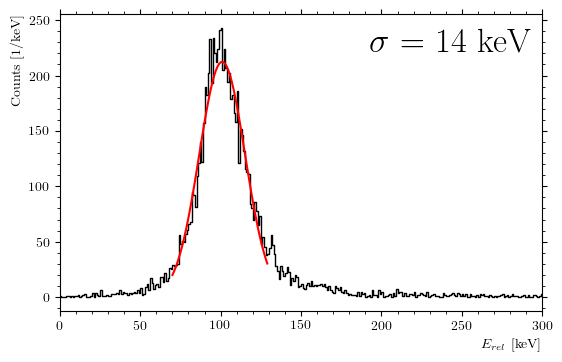

 FCN=111.486 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=4.71721e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.12392e+02   3.35269e+00   1.28687e-02  -3.49155e-04
   2  Mean         1.00936e+02   1.86706e-01   9.57228e-04   2.10952e-03
   3  Sigma        1.42265e+01   1.86332e-01   1.76117e-05  -2.29449e-01


In [14]:
%matplotlib

distance = 35
doubleplane = 30
energy = 600
erel = 100
neutron = 1
physics = "inclxx"

fn = filename_for(distance, doubleplane, energy, erel, neutron, physics, ".reco.root")
file = rootpy.io.root_open(fn, "read")
herel = file.Get(f"NeulandNeutronReconstructionMon/fhErel{neutron}")

fig = plt.figure(figsize=(6.224, 6.224 / 1.618))
ax = fig.add_subplot(111)
fit_n_plot(ax, 70, 130, herel)
ax.set_xlabel(r"$E_{rel}$ [keV]", horizontalalignment="right", x=1)
ax.set_ylabel(r"Counts [1/keV]", horizontalalignment="right", y=1)
fig.savefig(f"results/erel-{neutron}n-{erel}.pdf", bbox_inches="tight")
display(fig)

Using matplotlib backend: agg
3009.0 6074.0 0.4953901876852157


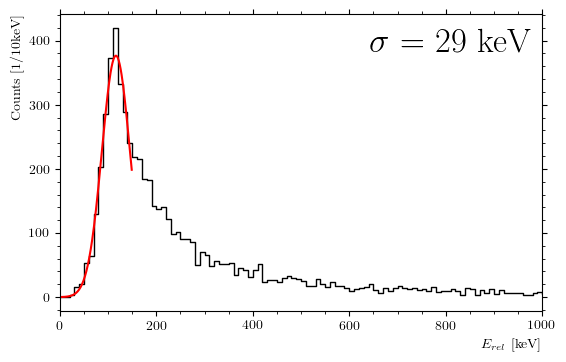

 FCN=21.5964 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.34629e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.76593e+02   9.74392e+00   1.78201e-02  -5.03139e-05
   2  Mean         1.16191e+02   9.60169e-01   1.61326e-03  -1.35400e-04
   3  Sigma        2.90061e+01   7.96337e-01   1.43080e-05   8.15262e-03


In [15]:
%matplotlib

distance = 35
doubleplane = 30
energy = 600
erel = 100
neutron = 4
physics = "inclxx"

fn = filename_for(distance, doubleplane, energy, erel, neutron, physics, ".reco.root")
file = rootpy.io.root_open(fn, "read")
herel = file.Get(f"NeulandNeutronReconstructionMon/fhErel{neutron}")
herel.rebin(10)

fig = plt.figure(figsize=(6.224, 6.224 / 1.618))
ax = fig.add_subplot(111)
ax.set_xlabel(r"$E_{rel}$ [keV]", horizontalalignment="right", x=1)
ax.set_ylabel(r"Counts [1/10keV]", horizontalalignment="right", y=1)
fit_n_plot(ax, 0, 150, herel)
ax.set_xlim(0, 1000)
fig.savefig(f"results/erel-{neutron}n-{erel}.pdf", bbox_inches="tight")
display(fig)

## d) Resolution as a function of relative energy for both distances

Using matplotlib backend: agg
7956.0 9522.0 0.8355387523629489
7517.0 9482.0 0.7927652394009702
7443.0 9485.0 0.7847127042698998
7606.0 9459.0 0.804101913521514
7539.0 9432.0 0.7993002544529262
7632.0 9146.0 0.8344631532910562
7352.0 9094.0 0.8084451286562568
7327.0 8961.0 0.8176542796562883
3540.0 4180.0 0.84688995215311
2047.0 2409.0 0.8497301784973018


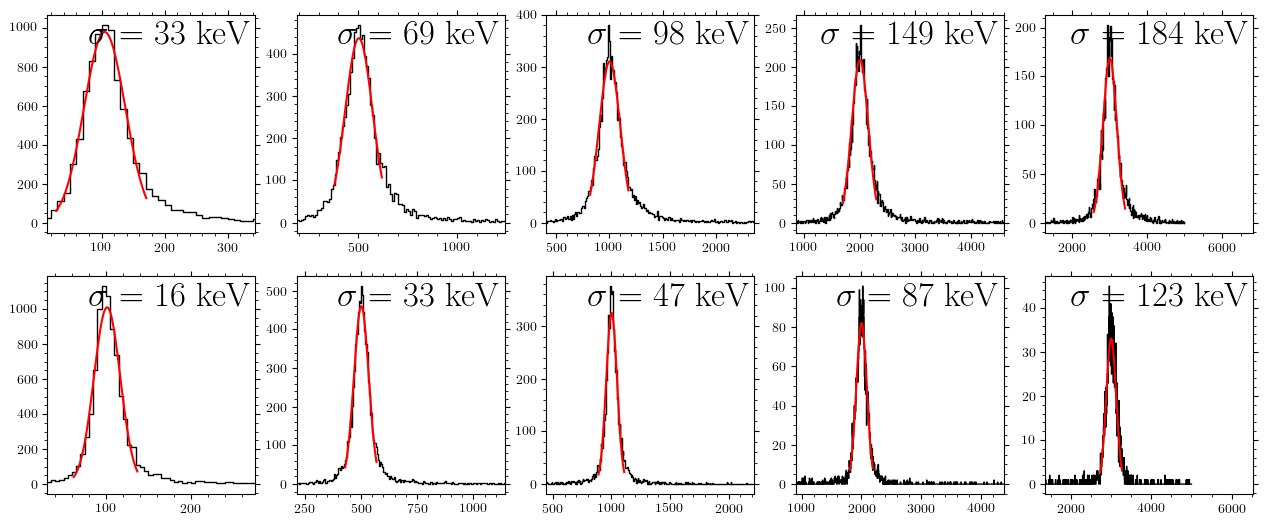

 FCN=56.0909 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=8.70609e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.77247e+02   1.48671e+01   4.10184e-02   4.88698e-05
   2  Mean         1.04932e+02   4.20510e-01   1.51171e-03  -1.51452e-03
   3  Sigma        3.26269e+01   4.04408e-01   1.18016e-05  -9.53862e-02
 FCN=44.7188 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=9.59358e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.36775e+02   7.24612e+00   1.72957e-02   1.17649e-05
   2  Mean         5.02896e+02   1.01938e+00   3.36504e-03  -9.79861e-05
   3  Sigma        6.92467e+01   

In [16]:
%matplotlib

jobs = [
    (distance, doubleplane, energy, erel, neutron)
    for distance in [15, 35]
    for doubleplane in [30]
    for energy in [600]
    for erel in [100, 500, 1000, 2000, 3000]
    for neutron in [1]
]

fig = plt.figure(figsize=(6.224 * 2.5, 6.224))
tmp = []
for i, job in enumerate(jobs):
    fn = filename_for(job[0], job[1], job[2], job[3], job[4], "inclxx", ".reco.root")
    file = rootpy.io.root_open(fn, "read")
    hist = file.Get(f"NeulandNeutronReconstructionMon/fhErel{job[4]}")

    if job[0] == 15:
        hist.rebin(10)
        xmin = 0.88 * job[3] - 60
        xmax = 1.12 * job[3] + 60
    else:
        hist.rebin(5)
        xmin = 0.92 * job[3] - 30
        xmax = 1.08 * job[3] + 30

    ax = fig.add_subplot(2, 5, i + 1)
    erel = fit_n_plot(ax, xmin, xmax, hist)

    ax.set_xlim(0.5 * xmin, 2 * xmax)

    tmp.append([*job, erel])

data = pd.DataFrame(tmp)
data.columns = ["distance", "doubleplane", "energy", "erel", "neutron", "sigma"]

display(fig)

In [20]:
display(data)
data.to_pickle("results/sigma.pkl")

,distance,doubleplane,energy,erel,neutron,sigma
0,15,30,600,100,1,32.626898
1,15,30,600,500,1,69.246749
...,...,...,...,...,...,...
8,35,30,600,2000,1,87.300513
9,35,30,600,3000,1,123.032879


Using matplotlib backend: agg


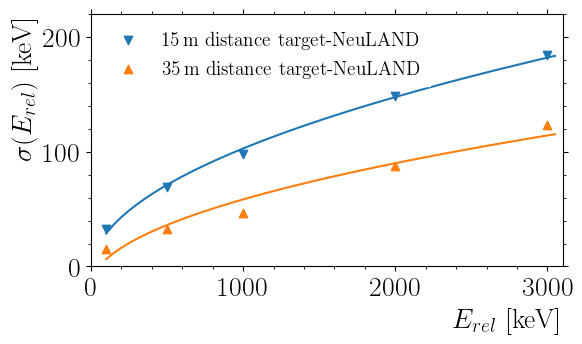

In [3]:
%matplotlib

import scipy.optimize
import pandas as pd
import numpy as np
from plotconfroot import *

data = pd.read_pickle("results/sigma.pkl")

fig = plt.figure(figsize=(6.224, 6.224 / 1.618))
ax = fig.add_subplot(111)
ax.set_xlim(0, 3100)
ax.set_xlabel(r"$E_{rel}$ [keV]", horizontalalignment="right", x=1)
ax.set_ylim(0, 220)
ax.set_ylabel(r"$\sigma(E_{rel})$ [keV]", horizontalalignment="right", y=1)


def func(x, a, b):
    return a * np.sqrt(x) + b


for symbol, distance in zip(["v", "^"],[15, 35]):
    tmp = data.loc[data["distance"] == distance]
    ax.scatter(
        tmp["erel"].values, tmp["sigma"].values, label=f"{distance}\,m distance target-NeuLAND", marker=symbol
    )

    fito, fitc = scipy.optimize.curve_fit(func, tmp["erel"].values, tmp["sigma"].values)
    xs = np.arange(100, 3100, 50)
    ys = func(xs, *fito)
    ax.plot(xs, ys)

ax.legend(loc="upper left", prop={"size": "x-small"})
fig.tight_layout()
fig.savefig("results/sigma.pdf", bbox_inches="tight")
display(fig)

## e) Other values

Basic efficiency

In [20]:
for doubleplane in doubleplanes:
    for energy in energies:
        fn = filename_for(
            distance=15,
            doubleplane=doubleplane,
            energy=energy,
            erel=500,
            neutron=1,
            physics="inclxx",
            what=".digi.root",
        )
        file = ROOT.TFile.Open(fn)
        hist = file.Get("NeulandPrimaryClusterMon/nClusters")
        primclus = [hist.GetBinContent(i) for i in range(1, 7)]
        print(doubleplane, energy, primclus[1] / hist.GetEntries())

8 200 0.5685
8 600 0.6079
8 1000 0.6484
12 200 0.7117
12 600 0.7559
12 1000 0.7888
20 200 0.8679
20 600 0.8929
20 1000 0.9092
30 200 0.9319
30 600 0.9481
30 1000 0.9575


Count number of events where a primary neutron undergoes a reaction before entering NeuLAND

In [ ]:
hists = []
tmpprereac = []
for energy in energies:
    for distance in [15, 35]:
        for neutron in [1, 4]:
            for physics in ["inclxx", "bic", "bert"]:
                fn = filename_for(
                    distance=distance,
                    doubleplane=30,
                    energy=energy,
                    erel=500,
                    neutron=neutron,
                    physics=physics,
                    what=".simu.root",
                )
                f = ROOT.TFile.Open(fn)
                primary_neutron_track_ids = range(1, neutron + 1)

                zse = []
                for e in f.evt:
                    zs = []
                    for i, track in enumerate(e.MCTrack):
                        if track.GetStartZ() < 1500 and track.GetMotherId() in primary_neutron_track_ids:
                            # print(all, i, track.GetMotherId(), track.GetPdgCode())
                            zs.append(track.GetStartZ())
                    if len(zs) > 0:
                        zse.append(zs)

                tmpprereac.append((energy, distance, neutron, physics, len(zse), len(zse) / f.evt.GetEntries()))
                flatten = lambda l: [item for sublist in l for item in sublist]
                hist = np.histogram(flatten(zse), range=(0, 1500), bins=1500)
                hists.append(hist)

In [ ]:
prereac = pd.DataFrame(tmpprereac)
prereac.columns = ["energy", "distance", "neutron", "physics", "evts", "frac"]
display(prereac[(prereac["physics"] == "inclxx") & (prereac["distance"] == 15)])

In [ ]:
%matplotlib
fig = plt.Figure()
ax = fig.add_subplot(111)
xs = np.arange(0, 1500)
ax.plot(xs, hist[0])
ax.set_yscale("log")
display(fig)